In [6]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Permet de sortir la figure
#%matplotlib qt
import warnings
warnings.filterwarnings('ignore')
#  Les resultat usuel statistiques utilises en ergonometries sont  directement donnes:
import statsmodels.api as sm
from statsmodels import regression 
from sklearn.preprocessing import PolynomialFeatures
# sklearn a une vision tres machine learning :
# Les resultat usuel statistiques utilises en ergonometries ne sont pas directement donnes: Ex: Ecart type
from sklearn.linear_model import LinearRegression
### Il faut diviser l'ensemble des donnees en DONNEES ENTRAINEMENT ET TESTE
from sklearn.model_selection import train_test_split
# StandardScaler : Veut dire que l'on va SOUSTRAIRE LA valeur MEAN /STD
# Une standardisation des données = VARIABLE CENTRE REDUITE(proba)
### Ramener toute les Variables à la meme Echelle
from sklearn.preprocessing import StandardScaler
# Pour l'encodage
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# Enregistre mon model
import pickle

In [7]:
df = pd.read_csv('c:\\Users\\Abize\\OneDrive\\Bureau\\Etienne_diane_phileas\\APICars\\data\\RAW\\cars.csv', index_col="car_ID")

In [4]:
pd.set_option("display.max_rows",205);
pd.set_option("display.max_columns",42);
df.head() 
df_copy = df.copy()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [181]:
print(df['price'].duplicated().value_counts())
print("************************************************************************************")
print(df['curbweight'].duplicated().value_counts())
print("************************************************************************************")
print(df.duplicated().value_counts())
print("************************************************************************************")
print(df['enginesize'].duplicated().value_counts())
print("************************************************************************************")
print(df.duplicated().value_counts())


False    189
True      16
Name: price, dtype: int64
************************************************************************************
False    171
True      34
Name: curbweight, dtype: int64
************************************************************************************
False    205
dtype: int64
************************************************************************************
True     161
False     44
Name: enginesize, dtype: int64
************************************************************************************
False    205
dtype: int64


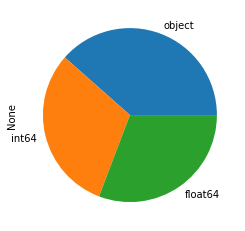

In [5]:
df.dtypes.value_counts().plot.pie();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
for col in df.select_dtypes('object'):
    #Creer un systeme de marge très rapide
    print("************************************************************************************")
    print( f'{col :-<70} {df[col].unique()}')
print("************************************************************************************")
print("************************************************************************************")

************************************************************************************
CarName--------------------------------------------------------------- ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'maz

car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64
************************************************************************************
0
************************************************************************************


<AxesSubplot:>

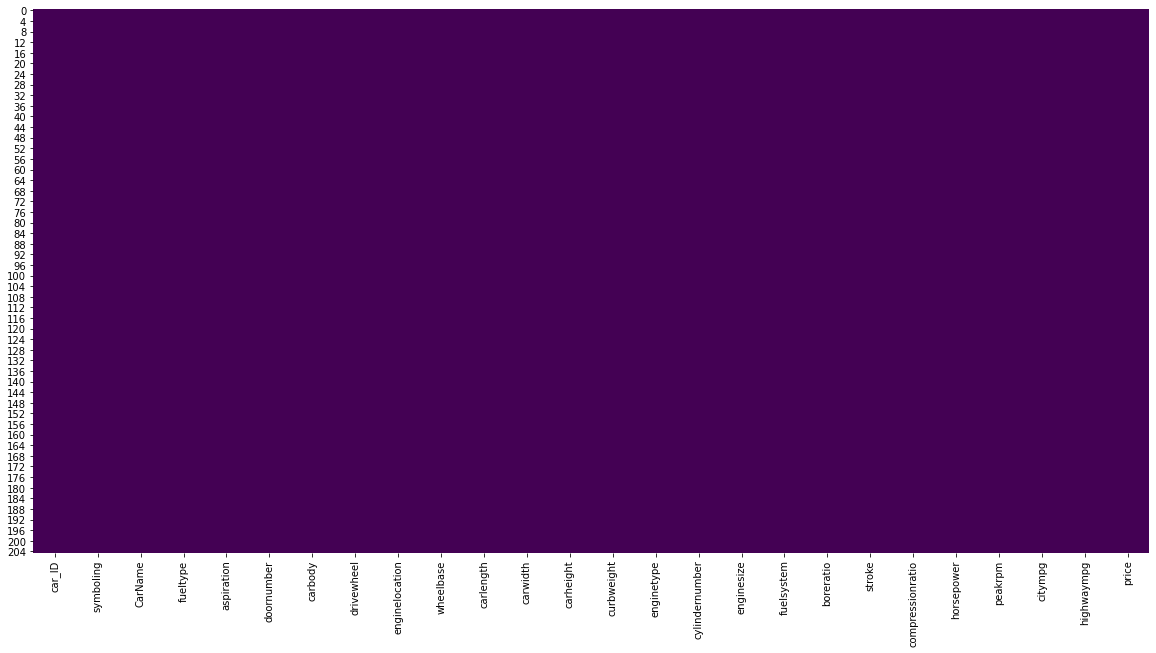

In [8]:
print(df.isna().sum().sort_values(ascending=False))
print("************************************************************************************")
print(df.isna().sum().sum())
print("************************************************************************************")
# Visualisation des valeur nulles
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False , cmap= 'viridis')

In [9]:
# D'apres les resultats on remarque qu'il y'a UNE CORRELATION LINEAIRE 0,99
# Quand la CORRELATION est proche de 1 : CA VEUT DIRE QU'IL EXISTE UNE FORTE CORRELATION
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [58]:
sns.set(rc = {'figure.figsize': (10, 5)})

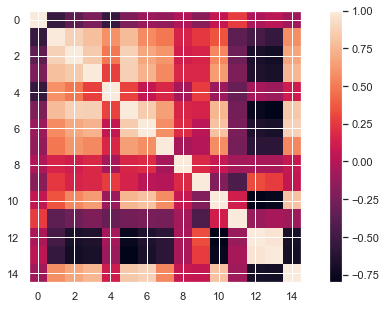

In [59]:
#Comme avec les couleurs c'n'est pas comprehensible on va ajouter plt.colorbar
plt.imshow(df.corr());
plt.colorbar();

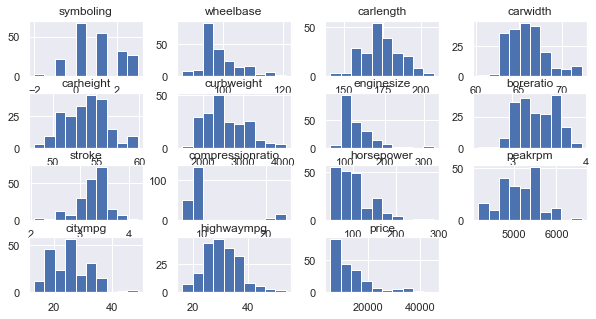

In [60]:
##On remarque que les 4 VARIABLES disposent presque: La meme forme = meme INFORMATION
##On SUPRIME UNE VARIABLE et ON GARDE 1
##Si on veut CARACTERISE UNE ENTREPRISE SUR UN MARCHE FINANCIER : IL SUFFIT DE TRAVAILLER sur 1 prix

df.hist(bins=10);

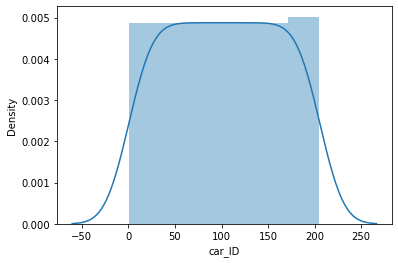

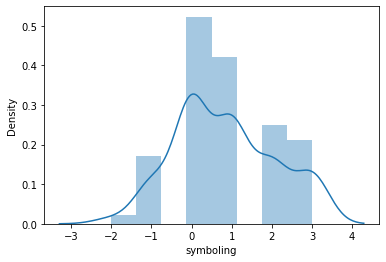

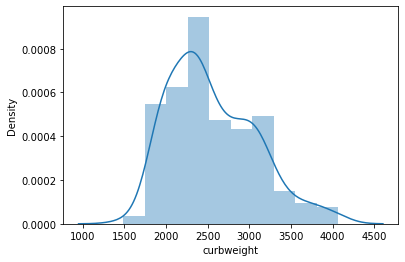

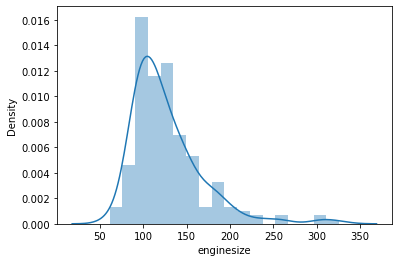

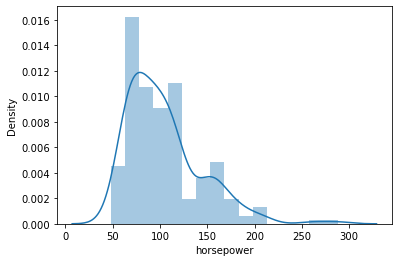

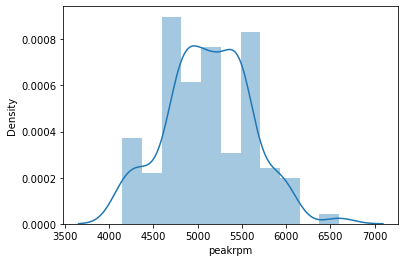

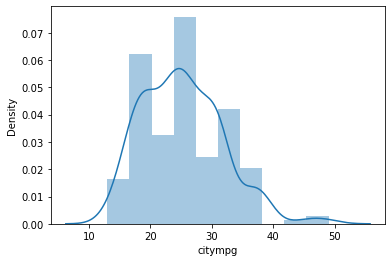

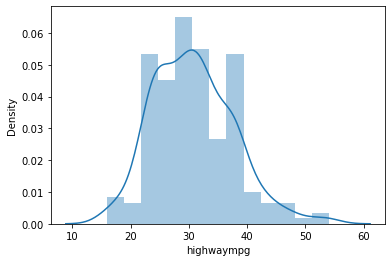

In [12]:
# Reagarder au niveau de la distribution si quelques variables suivent la loi normale
# Remarque: Pas mal des variables donne l'impression que les données ont été nettoye
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])


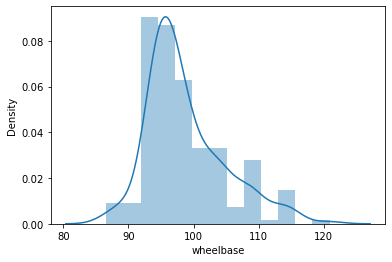

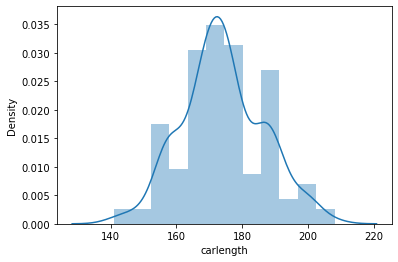

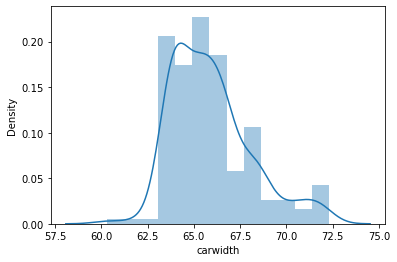

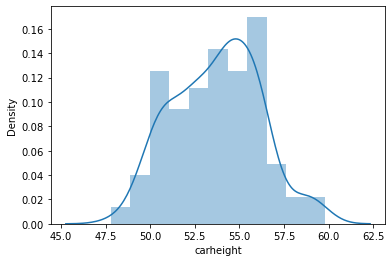

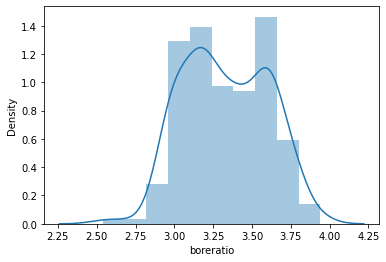

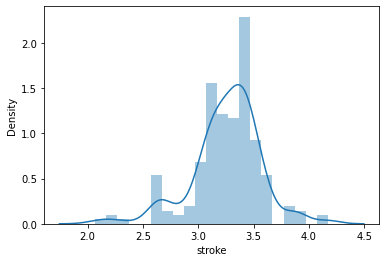

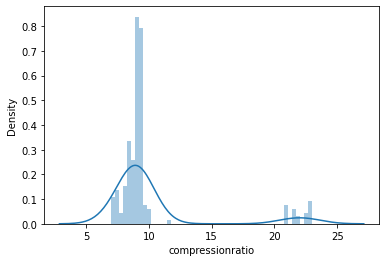

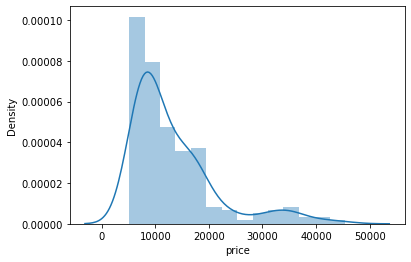

In [13]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[col])

In [183]:
 sns.set(rc = {'figure.figsize': (10, 5)})

In [105]:
sns.set(style="darkgrid")
sns.countplot(x="age", data=fusion_enregistre);

,x1,x2
x1,1.000000,0.835305
x2,0.835305,1.000000


In [403]:
df.describe(include = 'all')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota corolla,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [15]:
df_mean = df[['CarName','price']]
# df['price'].mean()
# Calcul du prix moyen par voiture
print("Prix moyen par vehicule : ",df_mean.mean())
print("*******************************************************************")
groupement = df.groupby(['CarName','curbweight'])['price'].describe()
groupement

Prix moyen par vehicule :  price    13276.710571
dtype: float64
*******************************************************************


32528.000  32528.000   
porsche boxter                  2800        37028.000  37028.000  37028.000   
porsche cayenne                 2756        34028.000  34028.000  34028.000   
                                3366        31400.500  31400.500  31400.500   
porsche macan                   2778        22018.000  22018.000  22018.000   
renault 12tl                    2579         9295.000   9295.000   9295.000   
renault 5 gtl                   2460         9895.000   9895.000   9895.000   
saab 99e                        2658        11850.000  11850.000  11850.000   
                                2847        18620.000  18620.000  18620.000   
saab 99gle                      2758        15510.000  15510.000  15510.000   
                                2808        18150.000  18150.000  18150.000   
saab 99le                       2695        12170.000  12170.000  12170.000   
                                2707        15040.000  15040.000  15040.000   
subaru                          2050         5118.000   5118.000   5118.000   
                                2145         7126.000   7126.000   7126.000   
subaru baja                     2340         9960.000   9960.000   9960.000   
subaru brz                      2190         7775.000   7775.000   7775.000   
subaru dl                       2120         7053.000   7053.000   7053.000   
                                2240         7603.000   7603.000   7603.000   
                                2420         8013.000   8013.000   8013.000   
                                2650        11694.000  11694.000  11694.000   
subaru r1                       2385         9233.000   9233.000   9233.000   
subaru r2                       2510        11259.000  11259.000  11259.000   
subaru trezia                   2290         7463.000   7463.000   7463.000   
subaru tribeca                  2455        10198.000  10198.000  10198.000   
toyota carina                   3110         8778.000   8778.000   8778.000   
toyota celica gt                2480        10698.000  10698.000  10698.000   
toyota celica gt liftback       2265         9298.000   9298.000   9298.000   
toyota corolla                  2122         8358.000   8358.000   8358.000   
                                2275         7788.000   7788.000   7788.000   
                                2326         8948.000   8948.000   8948.000   
                                2414        10898.000  10898.000  10898.000   
                                2536         9639.000   9639.000   9639.000   
                                2714        11549.000  11549.000  11549.000   
toyota corolla 1200             2015         6488.000   6488.000   6488.000   
                                2109         7198.000   7198.000   7198.000   
toyota corolla 1600 (sw)        2290         7898.000   7898.000   7898.000   
toyota corolla liftback         2169         8058.000   8058.000   8058.000   
                                2976        16558.000  16558.000  16558.000   
toyota corolla tercel           2300         9538.000   9538.000   9538.000   
toyota corona                   2040         6338.000   6338.000   6338.000   
                                2094         7738.000   7738.000   7738.000   
                                2204         8238.000   8238.000   8238.000   
                                2275         7898.000   7898.000   7898.000   
                                2414         9988.000   9988.000   9988.000   
                                3016        15998.000  15998.000  15998.000   
toyota corona hardtop           2280         6918.000   6918.000   6918.000   
toyota corona liftback          2540         8449.000   8449.000   8449.000   
toyota corona mark ii           1985         5348.000   5348.000   5348.000   
toyota cressida                 2975        17669.000  17669.000  17669.000   
toyota mark ii                  2081         6938.000   6938.000   6938.000   
                          

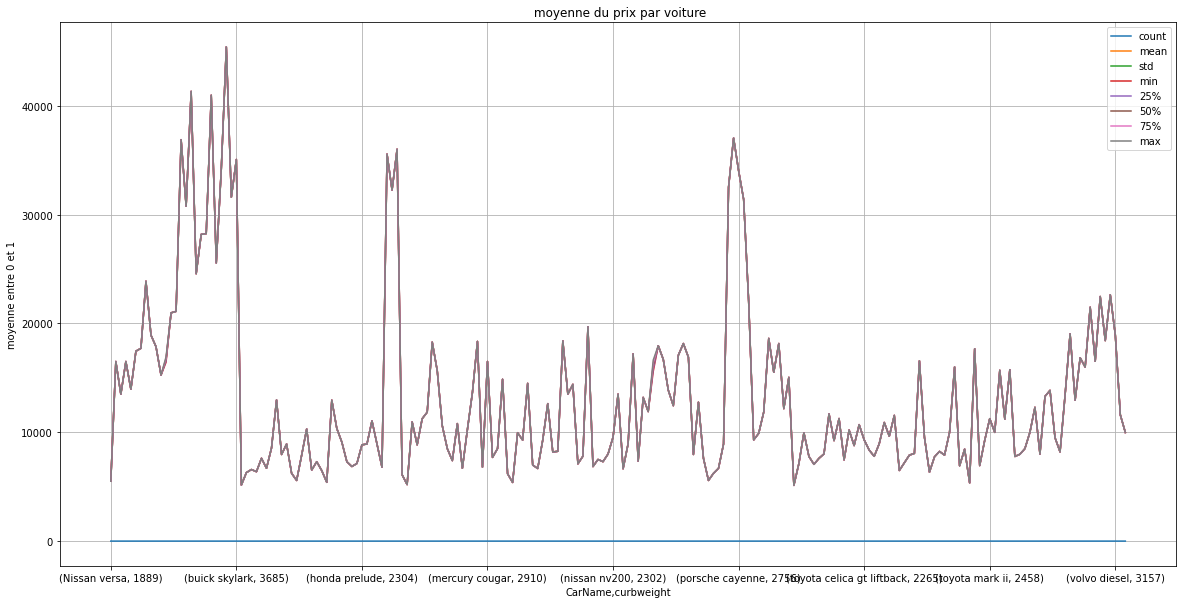

In [16]:
groupement.plot(figsize = (20,10));
plt.grid();
plt.title(" moyenne du prix par voiture");
plt.ylabel("moyenne entre 0 et 1");

In [20]:
df_test = df[['CarName','curbweight','enginetype', 'doornumber']]
correlation.corr()

In [42]:
df.groupby(['CarName','curbweight','enginetype', 'doornumber'])['price'].describe()

2326       ohc        four         8948.000   
                                2414       ohc        four        10898.000   
                                2536       ohc        two          9639.000   
                                2714       ohc        two         11549.000   
toyota corolla 1200             2015       ohc        four         6488.000   
                                2109       ohc        four         7198.000   
toyota corolla 1600 (sw)        2290       ohc        four         7898.000   
toyota corolla liftback         2169       ohc        two          8058.000   
                                2976       dohc       two         16558.000   
toyota corolla tercel           2300       dohc       two          9538.000   
toyota corona                   2040       ohc        two          6338.000   
                                2094       ohc        four         7738.000   
                                2204       ohc        two          8238.000   
                                2275       ohc        four         7898.000   
                                2414       ohc        four         9988.000   
                                3016       dohc       two         15998.000   
toyota corona hardtop           2280       ohc        four         6918.000   
toyota corona liftback          2540       ohc        two          8449.000   
toyota corona mark ii           1985       ohc        two          5348.000   
toyota cressida                 2975       ohc        two         17669.000   
toyota mark ii                  2081       ohc        four         6938.000   
                                2140       ohc        four         9258.000   
                                2458       ohc        four        11248.000   
toyota starlet                  2551       ohc        two          9989.000   
                                3131       dohc       four        15690.000   
toyota tercel                   2679       ohc        two         11199.000   
toyouta tercel                  3151       dohc       four        15750.000   
vokswagen rabbit                2261       ohc        two          7775.000   
volkswagen 1131 deluxe sedan    2209       ohc        two          7975.000   
volkswagen 411 (sw)             2275       ohc        four         8495.000   
volkswagen dasher               2300       ohc        four         9995.000   
                                2563       ohc        four        12290.000   
volkswagen model 111            2264       ohc        four         7995.000   
volkswagen rabbit               2661       ohc        four        13295.000   
volkswagen rabbit custom        2579       ohc        four        13845.000   
volkswagen super beetle         2319       ohc        four         9495.000   
volkswagen type 3               2212       ohc        four         8195.000   
volvo 144ea                     3034       ohc        four        13415.000   
                                3049       ohc        four        19045.000   
volvo 145e (sw)                 2912       ohc        four        12940.000   
                                2952       ohc        four        16845.000   
volvo 244dl                     2935       ohc        four        15985.000   
                                3012       ohcv       four        21485.000   
volvo 245                       3042       ohc        four        16515.000   
volvo 246                       3217       ohc        four        22470.000   
volvo 264gl                     3045       ohc        four        18420.000   
                                3062       ohc        four        22625.000   
volvo diesel                    3157       ohc        four        18950.000   
vw dasher                       2254       ohc        two         11595.000   
vw rabbit                       2221       ohc        two          9980.000   

                                                                        max  
Car

In [41]:
# Examine la puissance de la voiture('horsepower'), taille du moteur('enginesize') et engine type(type du moteur)
# Nombre de portes, type de carburant
df.groupby(['horsepower','enginesize','enginetype', 'doornumber', 'fueltype'])['price'].describe()

two        gas               NaN  15250.000   
111        108        ohcf       four       gas        307.591450  11259.000   
           130        dohc       two        gas       2124.855877  13495.000   
112        98         dohc       two        gas        169.705627   9298.000   
114        141        ohc        four       gas       3464.534240  12940.000   
115        136        ohc        four       gas               NaN  17450.000   
116        110        ohc        four       gas          0.000000   9279.000   
                                 two        gas               NaN   9959.000   
           146        ohc        two        gas       3260.734069   8449.000   
120        140        ohc        four       gas               NaN  18280.000   
121        164        ohc        four       gas       2446.589463  21105.000   
                                 two        gas               NaN  20970.000   
123        183        ohc        four       diesel    3029.923651  25552.000   
                                 two        diesel            NaN  28176.000   
134        173        ohcv       four       gas               NaN  21485.000   
135        80         rotor      two        gas               NaN  15645.000   
140        131        ohc        four       gas               NaN  23875.000   
142        134        l          four       gas               NaN  18150.000   
143        151        ohc        two        gas               NaN  22018.000   
145        156        ohc        two        gas       1052.457838  12629.000   
152        181        ohcv       four       gas        519.615242  13499.000   
154        152        ohcv       two        gas               NaN  16500.000   
155        234        ohcv       four       gas               NaN  34184.000   
                                 two        gas               NaN  35056.000   
156        161        dohc       four       gas               NaN  15750.000   
           171        dohc       four       gas               NaN  15690.000   
160        121        dohc       four       gas               NaN  18620.000   
                                 two        gas               NaN  18150.000   
           131        ohc        two        gas               NaN  17859.167   
           141        ohc        four       gas               NaN  19045.000   
           181        ohcv       two        gas        848.528137  17199.000   
161        171        dohc       two        gas        395.979797  15998.000   
162        130        ohc        four       gas        374.766594  18420.000   
175        140        ohc        two        gas               NaN  16503.000   
176        258        dohc       four       gas       2333.452378  32250.000   
182        209        ohc        four       gas       4327.493501  30760.000   
                                 two        gas               NaN  41315.000   
184        304        ohcv       two        gas               NaN  45400.000   
           308        ohcv       four       gas               NaN  40960.000   
200        181        ohcv       two        gas               NaN  19699.000   
207        194        ohcf       two        gas       2291.287847  32528.000   
262        326        ohcv       two        gas               NaN  36000.000   
288        203        dohcv      two        gas               NaN  31400.500   

                                                            25%        50%  \
horsepower enginesize enginetype doornumber fueltype                         
48         61         l          two        gas        5151.000   5151.000   
52         97         ohc        four       diesel     7995.000   7995.000   
                                 two        diesel     7775.000   7775.000   
55         103        ohc        two        diesel     7099.000   7099.000   
56         110        ohc        four       diesel     7815.500   7843.000   
58         92         ohc        two        ga

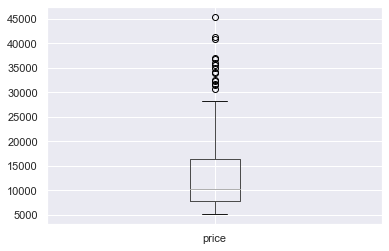

In [87]:
df[["price"]].boxplot();

In [88]:
# On va instancie la classe
ss = StandardScaler();
#Les deux variables Possedes la MEME echelle
X_ss = ss.fit_transform(df[['price', 'curbweight']])
X_ss

array([[ 2.73911432e-02, -1.45662821e-02],
       [ 4.04461099e-01, -1.45662821e-02],
       [ 4.04461099e-01,  5.14881916e-01],
       [ 8.44849301e-02, -4.20797445e-01],
       [ 5.23667906e-01,  5.16807182e-01],
       [ 2.47610036e-01, -9.35021953e-02],
       [ 5.56292928e-01,  5.55312506e-01],
       [ 7.08124756e-01,  7.67091785e-01],
       [ 1.32988237e+00,  1.02122692e+00],
       [ 5.75010530e-01,  9.57693137e-01],
       [ 3.95677439e-01, -3.09132007e-01],
       [ 4.57790460e-01, -3.09132007e-01],
       [ 9.65360500e-01,  2.97326838e-01],
       [ 9.82300415e-01,  4.03216478e-01],
       [ 1.41646416e+00,  9.61543669e-01],
       [ 2.19381802e+00,  1.29846525e+00],
       [ 3.51826840e+00,  1.58725518e+00],
       [ 2.96176083e+00,  1.82791345e+00],
       [-1.01962107e+00, -2.05534843e+00],
       [-8.76070979e-01, -1.31219568e+00],
       [-8.40936341e-01, -1.24481137e+00],
       [-9.66793634e-01, -1.30834515e+00],
       [-8.65781550e-01, -1.30834515e+00],
       [-6.

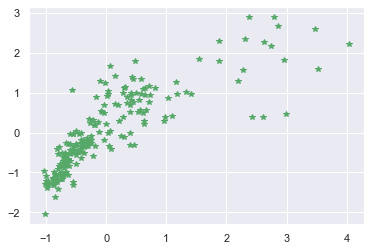

In [89]:
plt.plot(X_ss[:,0],X_ss[:,1], "*g");

In [90]:
from sklearn.cluster import KMeans
#Instancier 
model = KMeans()

In [91]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 8);
# y_pred : Les differents groupes
y_pred = model.fit_predict(X_ss)
y_pred 

array([5, 5, 1, 5, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 1, 7, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 5, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 5, 2, 2,
       0, 0, 5, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 1,
       1, 7, 7, 7, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 2, 2, 5, 6, 6, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 6, 6, 6, 1, 1, 1, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 1, 0, 0, 0, 0, 2, 2, 5, 1, 4, 4, 4, 7, 2, 2,
       5, 5, 5, 5, 1, 1, 0, 0, 2, 0, 2, 2, 2, 5, 2, 2, 2, 5, 0, 0, 0, 2,
       2, 6, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 1, 2, 2, 2,
       2, 2, 1, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 6, 6, 1, 6,
       1, 1, 1, 1, 1, 1, 1])

In [92]:
df['price'].values[y_pred==1]

array([16500.   , 17450.   , 17710.   , 18920.   , 23875.   , 17859.167,
       20970.   , 21105.   , 24565.   , 18280.   , 18344.   , 16503.   ,
       17199.   , 19699.   , 18399.   , 18150.   , 22018.   , 18150.   ,
       18620.   , 17669.   , 16558.   , 15985.   , 18420.   , 18950.   ,
       16845.   , 19045.   , 21485.   , 22470.   , 22625.   ])

In [ ]:
#[['price', 'curbweight']]

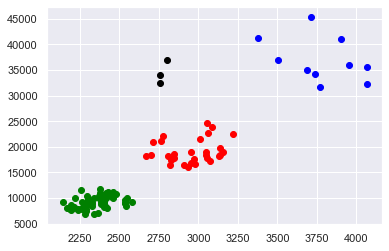

In [94]:
plt.scatter(df['curbweight'].values[y_pred==1],  df['price'].values[y_pred==1] , marker = "o", color="red");
plt.scatter(df['curbweight'].values[y_pred==2],  df['price'].values[y_pred==2] , marker = "o", color="green");
plt.scatter(df['curbweight'].values[y_pred==3],  df['price'].values[y_pred==3] , marker = "o", color="blue");
plt.scatter(df['curbweight'].values[y_pred==4],  df['price'].values[y_pred==4] , marker = "o", color="black");


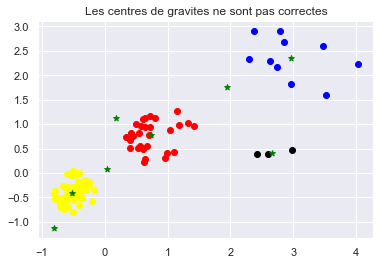

In [95]:
plt.scatter(X_ss[y_pred==1,0],  X_ss[y_pred==1,1] , marker = "o", color="red");
plt.scatter(X_ss[y_pred==2,0],  X_ss[y_pred==2,1] , marker = "o", color="yellow");
plt.scatter(X_ss[y_pred==3,0],  X_ss[y_pred==3,1] , marker = "o", color="blue");
plt.scatter(X_ss[y_pred==4,0],  X_ss[y_pred==4,1] , marker = "o", color="black");
## Tracer les centroides = centre de gravite
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="*", color="green");
plt.title("Les centres de gravites ne sont pas correctes");

In [71]:
df_statistiques = df[['curbweight', 'price']]

In [126]:
y = df['price']
X= df['curbweight']
# Decouverte de statsmodel : qui s'appuie sur pandas pour le stockage des données
#patsy : Decrire les modeles par les formules 
import patsy
# Renvoie 2 dataframes: 
# y(qui est le dataframe de la reponse )
# X le dataframe des variables independantes, avec une colonne supplementaire intercept qui est à 1
y, X = patsy.dmatrices( "y ~  X", data=df, return_type = 'dataframe')
# Ajuste le model
import statsmodels.api   
#Definir le model

#Variable cible: "price" et Variable explicatif : 'curbweight'
mod = statsmodels.api.OLS(y,X)   # REGRESSION DES MOINDRES CARRES ORDINAIRE 
#calcul le modele
result = mod.fit()
# Pour vour les resultats
print(result.summary())
#Voir les resultats sous forme de html
#print(result.summary().as_html())
# Voir les resultats sous forme de text()
#print(result.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.21e-54
Time:                        17:25:53   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.948e+04   1543.962    -12.614      0.0

In [157]:
sns.set(rc = {'figure.figsize': (10, 5)})

In [136]:
#les paramètres du modèle (intercept en tête)
print(" les paramètres du modèle (intercept en tête ")
print(result.params )
print("**********************")
# les valeurs prédites.
print("les valeurs prédites.")
print(result.fittedvalues )
print("**********************")
#les résidus (series).
print("es résidus (series)")
print(result.resid)
print("**********************")
#les p values pour chaque paramètre (series)
print("les résidus (series).")
print(result.pvalues )
print("**********************")
# la p value globale
print("la p value globale ")
print(result.f_pvalue )
print("**********************")
# le R2
print("le R2")
print(result.rsquared)
print("**********************")

 les paramètres du modèle (intercept en tête 
Intercept    9.094947e-13
x1           1.000000e+00
x2           4.440892e-15
dtype: float64
**********************
les valeurs prédites.
car_ID
1      13495.000
2      16500.000
3      16500.000
4      13950.000
5      17450.000
6      15250.000
7      17710.000
8      18920.000
9      23875.000
10     17859.167
11     16430.000
12     16925.000
13     20970.000
14     21105.000
15     24565.000
16     30760.000
17     41315.000
18     36880.000
19      5151.000
20      6295.000
21      6575.000
22      5572.000
23      6377.000
24      7957.000
25      6229.000
26      6692.000
27      7609.000
28      8558.000
29      8921.000
30     12964.000
31      6479.000
32      6855.000
33      5399.000
34      6529.000
35      7129.000
36      7295.000
37      7295.000
38      7895.000
39      9095.000
40      8845.000
41     10295.000
42     12945.000
43     10345.000
44      6785.000
45      8916.500
46      8916.500
47     11048.000
48     322

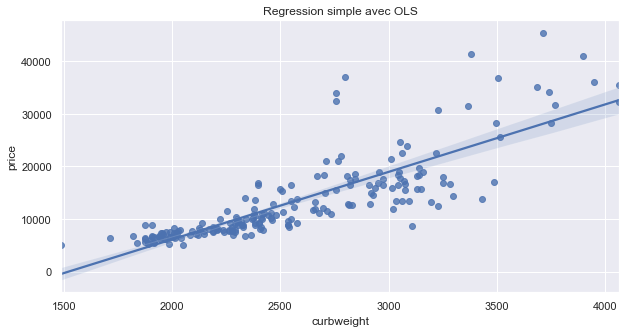

In [325]:
sns.regplot(x = 'curbweight', y= 'price' , data= df, scatter= True, fit_reg= True, ci=95);
#plt.plot(X, y, c='red');
plt.title("Regression simple avec OLS");

In [80]:
import patsy
y = df['price']
x1= df['curbweight']
x2 = df['enginesize'] 
y, X = patsy.dmatrices( "y ~  x1 + x2 ", data=df, return_type = 'dataframe')
# Ajuste le model
import statsmodels.api   
#Definir le model
mod = statsmodels.api.OLS(y,X)
#calcul le modele
result = mod.fit()
# Pour vour les resultats
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           3.77e-70
Time:                        20:27:45   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.415e+04   1387.924    -10.192      0.0

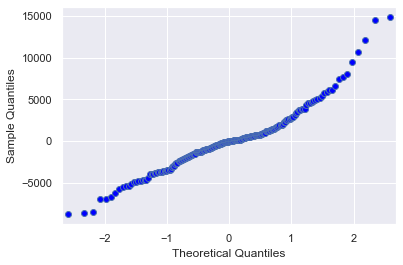

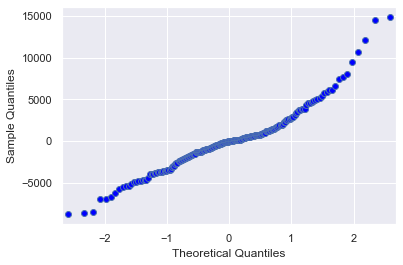

In [83]:
# Dessine la droite d'henri
import statsmodels.api as sm
sm.qqplot(result.resid)
#plt.title("Representation des residus")

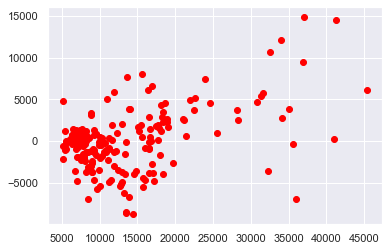

In [84]:
# C'est tres mauvais signe avec un tel graphique des resudus 
# Il faut corriger les soucis
plt.scatter(df.price, result.resid, c="red");

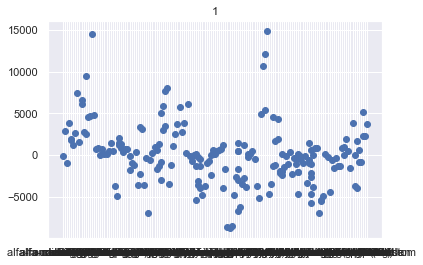

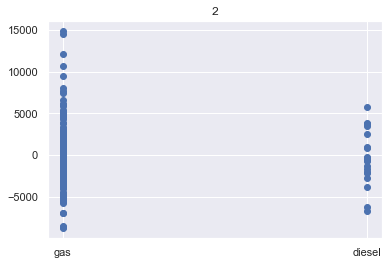

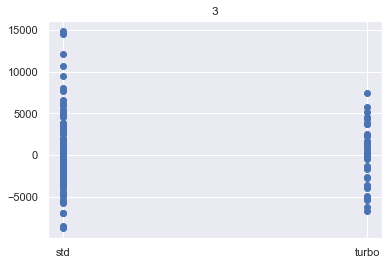

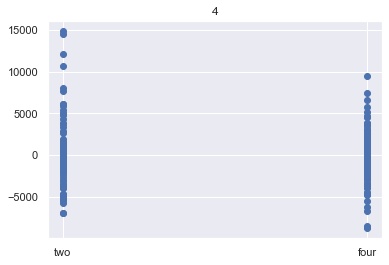

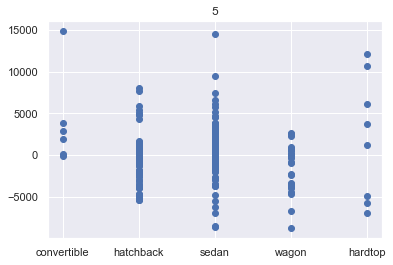

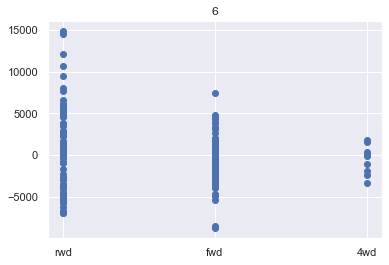

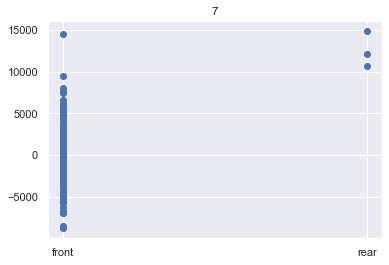

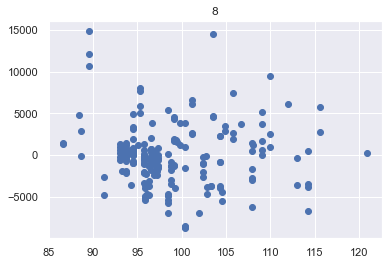

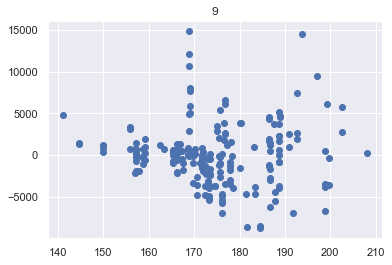

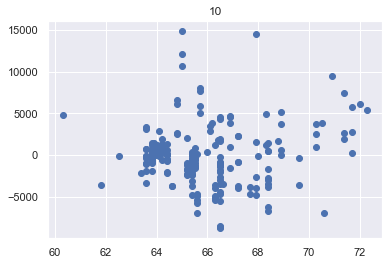

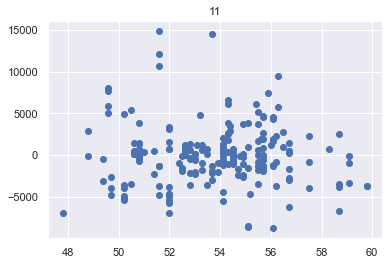

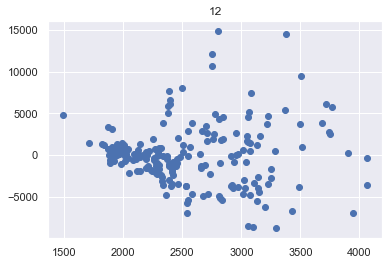

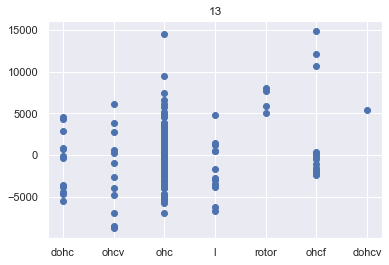

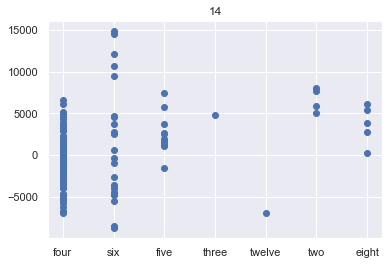

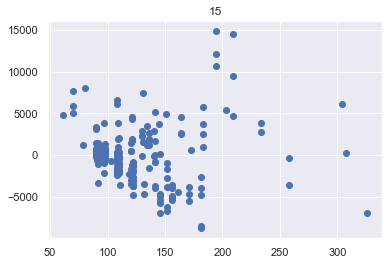

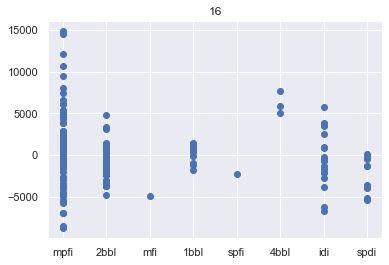

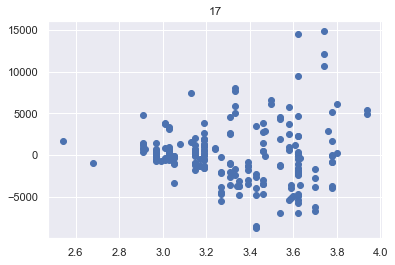

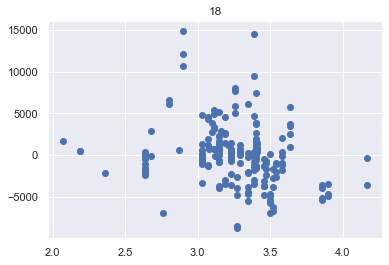

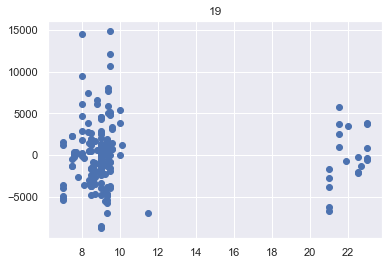

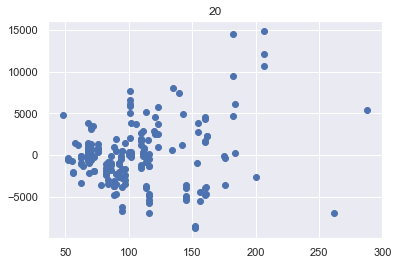

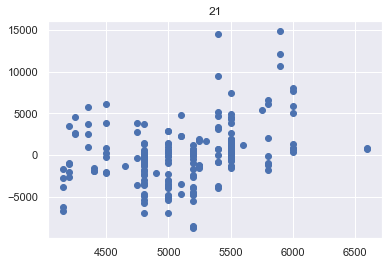

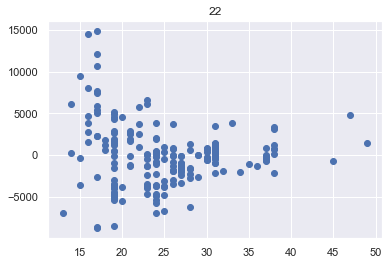

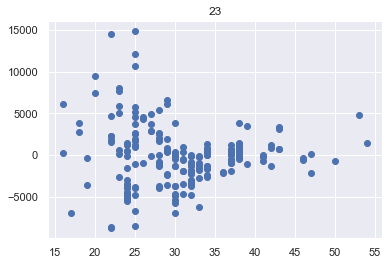

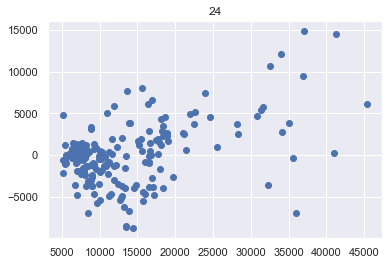

In [88]:
# Inspecter s'il y'a des formes de regularites
# voir aussi s'il y'a des points atypiques

for j in range(1,25):
    plt.scatter(df.iloc[:,j], result.resid);
    plt.title(j);
    plt.show();

In [159]:
# le nombre de degrés de liberté du modèle (nombre de paramètres - 1)
print("le nombre de degrés de liberté du modèle (nombre de paramètres - 1)")
print(result.df_model )
print("**********************")

#  le nombre de degrés de liberté des résidus
print("le nombre de degrés de liberté des résidus")
print(result.df_resid )
print("**********************")
#  le nombre d'observations
print("le nombre d'observations")
print(result.nobs )
print("**********************")

le nombre de degrés de liberté du modèle (nombre de paramètres - 1)
2.0
**********************
le nombre de degrés de liberté des résidus
202.0
**********************
le nombre d'observations
205.0
**********************


In [160]:
# l'AIC : traduit la complexite du model par rapport à la valeur explicative (y) 
print(" indice de parimonie l'AIC  : Selectionne les Xi a conserver")
print(result.aic )
print("**********************")
# le BIC  traduit la complexite du model par rapport à la valeur explicative (y) 
print(" indice de parimonie le BIC : Selectionne les Xi a conserver")
print(result.bic )
print("**********************")
# la variance totale (somme des carrés des écarts à la moyenne)
print("a variance totale (somme des carrés des écarts à la moyenne)")
print(result.centered_tss )
print("**********************")
# la variance expliquée (somme des carrés des différences entre valeurs prédites et moyenne)
print("la variance expliquée (somme des carrés des différences entre valeurs prédites et moyenne)")
print(result.ess )
print("**********************")
#  la variance résiduelle (somme des carrés des résidus). centered_tss = ess + ssr.
print("la variance résiduelle (somme des carrés des résidus). centered_tss = ess + ssr.")
print(result.ssr)
print("**********************")

# ess divisé par le nombre de degrés de liberté des paramètres.
print("divisé par le nombre de degrés de liberté des paramètres.")
print(result.mse_model )
print("**********************")
# ssr divisé par le nombre de degrés de liberté des résidus.
print("divisé par le nombre de degrés de liberté des résidus.")
print(result.mse_resid )
print("**********************")

#  centered_tss divisé par somme des degrés de liberté des paramètres et des résidus
print("ivisé par somme des degrés de liberté des paramètres et des résidus")
print(result.mse_total)
print("**********************")

 indice de parimonie l'AIC 
3946.484492562386
**********************
 indice de parimonie le BIC 
3956.4535224998012
**********************
a variance totale (somme des carrés des écarts à la moyenne)
13019639361.993183
**********************
la variance expliquée (somme des carrés des différences entre valeurs prédites et moyenne)
10345192310.50185
**********************
la variance résiduelle (somme des carrés des résidus). centered_tss = ess + ssr.
2674447051.491333
**********************
divisé par le nombre de degrés de liberté des paramètres.
5172596155.250925
**********************
divisé par le nombre de degrés de liberté des résidus.
13239836.888570955
**********************
ivisé par somme des degrés de liberté des paramètres et des résidus
63821761.57839796
**********************


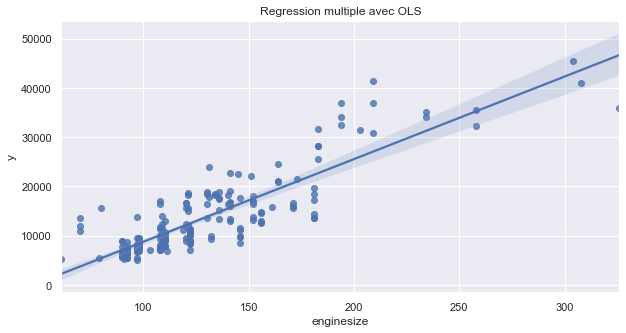

In [324]:
sns.regplot( x2, y , data= df,  scatter= True, fit_reg= True, ci=95);
#plt.plot(x2, y, c='red');
plt.title("Regression multiple avec OLS");

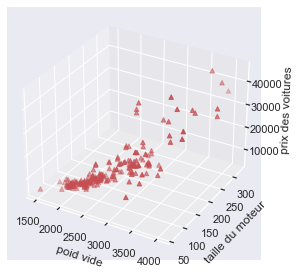

In [323]:
#sns.set(rc = {'figure.figsize': (10, 5)})
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,2,1, projection = '3d' );
ax.scatter(x1, x2, y, c='r', marker= '^');
ax.set_xlabel('poid vide');
ax.set_ylabel('taille du moteur');
ax.set_zlabel('prix des voitures');
plt.show();

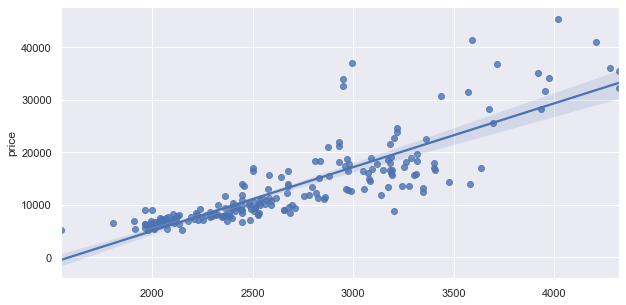

In [461]:
sns.regplot( x1 + x2, y , data= df, scatter= True, fit_reg= True,  ci=95);

In [161]:
y=df['price']
X= df['curbweight']
model = statsmodels.regression.linear_model.OLS.from_formula("y ~ df['curbweight']", data = df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              1224.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                    3.69e-88
Time:                        18:05:22   Log-Likelihood:                         -2069.2
No. Observations:                 205   AIC:                                      4140.
Df Residuals:                     204   BIC:                                      4144.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [164]:
print(" les paramètres du modèle (intercept en tête ")
print(result.params )
print("**********************")
# les valeurs prédites.
#print("les valeurs prédites.")
#print(result.fittedvalues )
#print("**********************")
#les résidus(Erreur de prediction observe dans l'echantillon) (series).
print("les résidus (series)")
print(result.resid)
print("**********************")
#les p values pour chaque paramètre (series)
print("les résidus (series).")
print(result.pvalues )
print("**********************")
# la p value globale
print("la p value globale ")
print(result.f_pvalue )
print("**********************")

 les paramètres du modèle (intercept en tête 
df['curbweight']    5.497539
dtype: float64
**********************
les résidus (series)
car_ID
1       -512.728866
2       2492.271134
3        980.447964
4       1102.251821
5       1924.950425
6       1467.670225
7       2074.999649
8       2680.270381
9       6909.595259
10      1075.181039
11      3263.394571
12      3758.394571
13      6071.669848
14      5904.305214
15      7770.018962
16     13002.949671
17     22733.318851
18     17611.126501
19     -3029.337736
20     -4007.387714
21     -3919.801572
22     -4741.382791
23     -3936.382791
24     -3741.762569
25     -4584.658822
26     -4242.604676
27     -3325.604676
28     -3487.107514
29     -5015.260862
30     -2489.581571
31     -2938.283967
32     -3145.023080
33     -4699.978778
34     -4136.225275
35     -3624.185896
36     -3755.052991
37     -3832.018534
38     -4397.496760
39     -3488.866316
40     -3821.329398
41     -2745.162037
42      -606.433145
43     -2260.856472

In [327]:
X = df[['curbweight']]
#print(Xvar)
y = df[['price']]
#print(Yvar)

In [329]:
model = LinearRegression()
# entrainement du modele
model.fit(X, y) 
# évaluation avec le coefficient de corrélation
# Verification des performance du model
model.score(X, y) 

0.6977342414446954

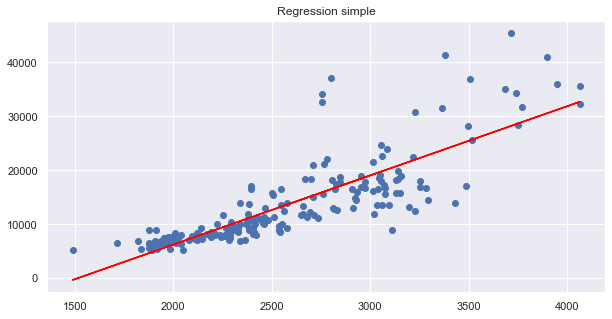

In [330]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red');
plt.title("Regression simple");

In [517]:
sns.set(rc = {'figure.figsize': (10, 5)}); 

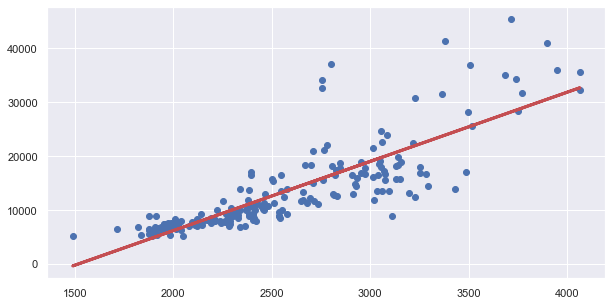

In [451]:
# Regression simple
model = LinearRegression().fit(X, y);
y_pred = model.predict(X);
plt.scatter(X, y);
plt.plot(X, y_pred, c='r', lw=3);

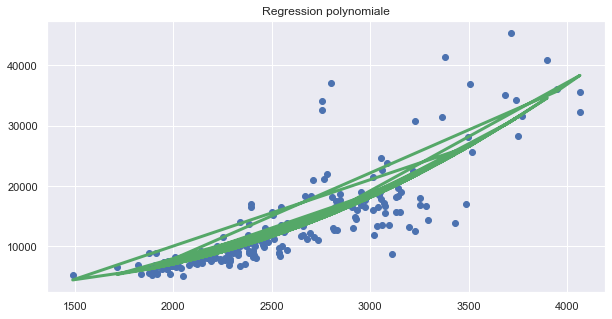

In [39]:
#Regression polynomiale: le but etant de voir si ça suit bien le nuage de points
X_poly = PolynomialFeatures().fit_transform(X);
model = LinearRegression().fit(X_poly, y);
y_pred = model.predict(X_poly);
# Visualisation
plt.scatter(X, y);
plt.plot(X, y_pred, c='g', lw=3);
plt.title("Regression polynomiale");

In [6]:
X = df[['curbweight']]
y = df[['price']]

In [13]:
#test_size: 0.3 vaut servir pour tester le model
#train 0.7 : vaut servir pour entraine le model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print(X.shape)
print(X_train.shape) #70% des donnees
print(X_test.shape)    #30% des donnees
print("*******************")
print(y_train.shape)
print(y_test.shape)
#print(X.shape)
#print(y.shape)

(205, 1)
(143, 1)
(62, 1)
*******************
(143, 1)
(62, 1)


In [24]:
sns.set(rc = {'figure.figsize': (10, 5)})

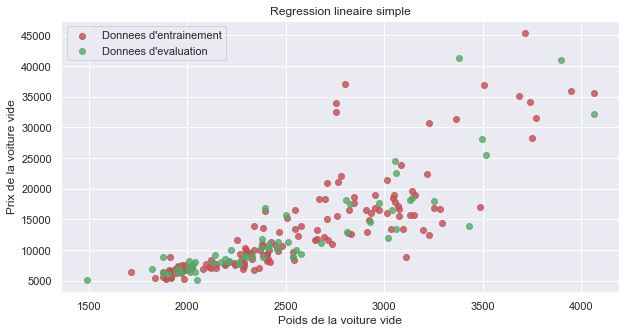

In [25]:
plt.scatter(X_train,  y_train, label= 'Donnees d\'entrainement', color = 'r', alpha=0.8);
plt.scatter(X_test, y_test, label= 'Donnees d\'evaluation', color = 'g' , alpha=0.8);
plt.xlabel("Poids de la voiture vide");
plt.ylabel("Prix de la voiture vide");
plt.title('Regression lineaire simple');
plt.legend();
plt.show();

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.fit(X_test, y_test)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

print("Comparer les valeurs predictes par notre model aux valeurs realisés")
print("Valeur de depart", y_test.head(10))
print("Valeur predict :" , model.predict(X_test))


In [ ]:
# DERNIERE ETAPE AVANT LA MODELISATION DE DONNEES 
# QUAND ON REGARDE LE MAX ON VOIT QUE TOUTES LES VARIABLES N'ONT PAS LA MEME TAILLE
print(X_train.describe())
print("**********************")
print(X_test.describe())
print("**********************")
print(y_train.describe())
print("**********************")
print(y_test.describe() )  
                       

In [ ]:

#donne un tablo de np
print(type(X_train_ss)) 
print("******************************")
#Visualise 
print(X_test_ss ) 
print("******************************")
#CONCLUSION : Rescaling grace a cette methode on va ramene tous à la meme echelle
#Visualise 
#print(X_train.values)
#print("******************************")

In [ ]:
##ON NE VA PAS APPLIQUE le "Rescaling " sur y_train
#y_train : CAR ON CLASSIFICATION la variable CIBLE est souvent une variable discrete sexest binaire(0 ou 1 ) donc on #n'applique pas les transformation d'echelle à des variable discrete 
# Mais dans notre cas je peut me permetre de l'applique
y_train_ss = ss.fit_transform(y_train)
y_test_ss = ss.transform(y_test)
print(y_train_ss)
print("************************")
print(y_test_ss)

In [75]:
## On va applique le model de Regession
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# entrainement du modele
model.fit(X_train_ss, y_train) 
## Etape de teste ou on va applique l'algo entraine sur le test
y_pred = model.predict(X_test_ss);
# évaluation avec le coefficient de corrélation
model.score(X_test_ss, y_test)
 

print(y_pred.shape )
print("***********************")
print("***********************")       
print(y_test.shape)

#CONCLUSION: On ne peut pas compare 1 tablo de 62 lignes avec 143 lignes

0.7488422463735578

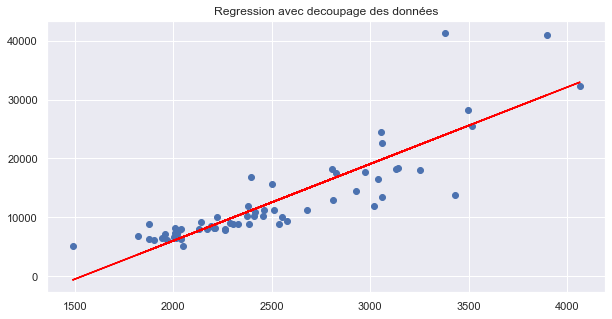

In [76]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='red');
plt.title("Regression avec decoupage des données");

In [345]:
pd.set_option("display.max_rows",205);
pd.set_option("display.max_columns",54);

In [ ]:
# Encodage
df_cathegories = df[['fueltype','aspiration', 'doornumber','drivewheel', 'enginelocation','enginetype', 'cylindernumber', 'fuelsystem' ]]

In [14]:
ordinal = df[['doornumber','cylindernumber']]
print(df['doornumber'].unique())
print(df['cylindernumber'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [16]:
# Encodage des variables cathegoriques
nominal = df[['aspiration','drivewheel', 'enginelocation','enginetype','fuelsystem' ]]
ordinal = df[['doornumber','cylindernumber']]

ohe = OneHotEncoder(sparse = False)
ohe.fit_transform(nominal, y=None)

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [17]:
odi = OrdinalEncoder(categories=[['two', 'four'],['four' ,'six', 'five', 'three', 'twelve', 'two' ,'eight']])
odi.fit_transform(df[['doornumber','cylindernumber']])

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [0., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [0., 2.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 3.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 4.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 5.],
       [0., 5.],
       [0., 5.],
       [0., 5.

In [485]:
# Enregistrement du model
file = 'LinearRegressionModel.sav'
pickle.dump(model, open(file, 'wb'))